# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

In [4]:
SEED = 42

# Overfitting

In [5]:
df = pd.read_csv('Data//bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


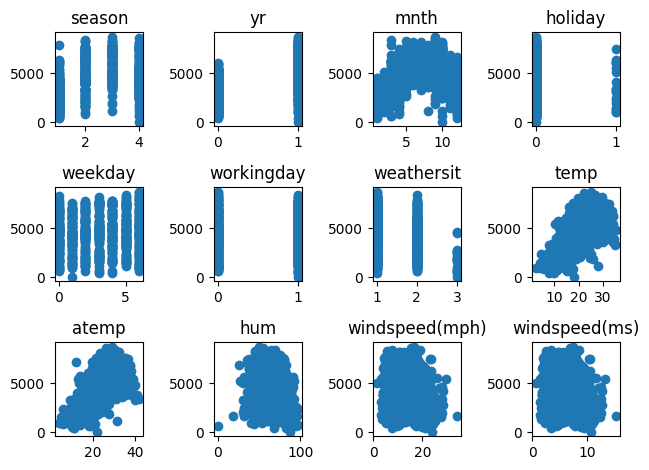

In [6]:
for i in range(df.shape[1] - 1):
    colum = df.columns[i]
    plt.subplot(3, 4, i + 1)
    plt.scatter(df[colum], df['cnt'])
    plt.title(colum)
    
plt.tight_layout()
plt.show()

In [7]:
df.drop(columns=['cnt']).corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [8]:
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms)
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000


In [9]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [11]:
df_shuffled = shuffle(df, random_state=SEED)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [15]:
regressor = LinearRegression()
regressor.fit(X, y)
for name, weight in zip(df.columns, regressor.coef_):
    print(f'{name}: {weight}')

season: 570.863641661725
yr: 1021.9604245185086
mnth: -141.3006331900142
holiday: -86.75760471139698
weekday: 137.2272583151452
workingday: 56.38980357474366
weathersit: -330.2271825899341
temp: 367.4799030832653
atemp: 585.5521797658965
hum: -145.6155228231448
windspeed(mph): 12454356291009.727
windspeed(ms): -12454356291208.188


In [17]:
lasso = Lasso()
lasso.fit(X, y)
for name, weight in zip(df.columns, lasso.coef_):
    print(f'{name}: {weight}')

season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08


In [19]:
ridge = Ridge()
ridge.fit(X, y)
for name, weight in zip(df.columns, ridge.coef_):
    print(f'{name}: {weight}')

season: 563.0645722520164
yr: 1018.9483787875275
mnth: -131.87332028247582
holiday: -86.74609799709243
weekday: 138.00511117871926
workingday: 55.90311037506429
weathersit: -332.34978849907236
temp: 386.45788919189926
atemp: 566.3470470600766
hum: -145.0713272986732
windspeed(mph): -99.25944108174306
windspeed(ms): -99.25944115438946


In [20]:
alphas = np.arange(1, 500, 50)
coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

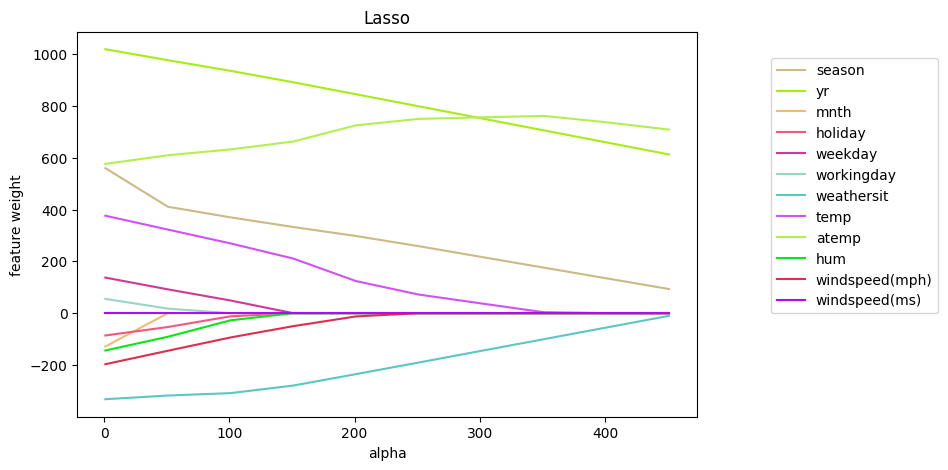

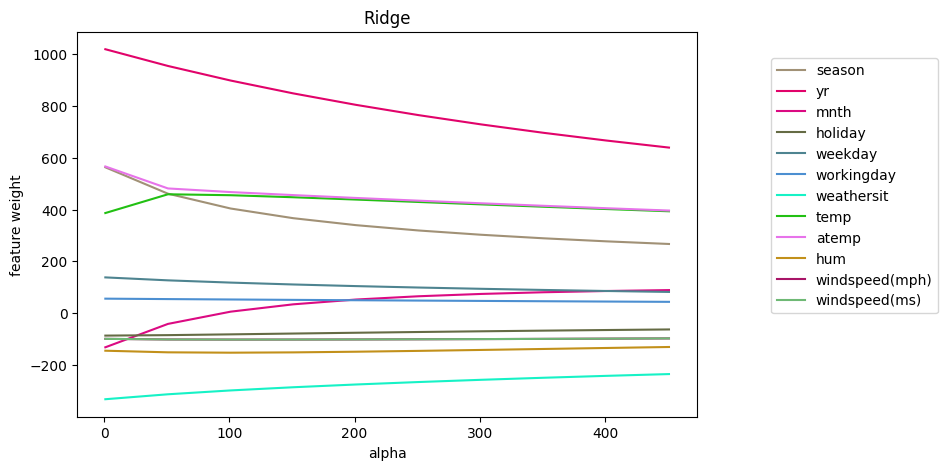

In [21]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [23]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

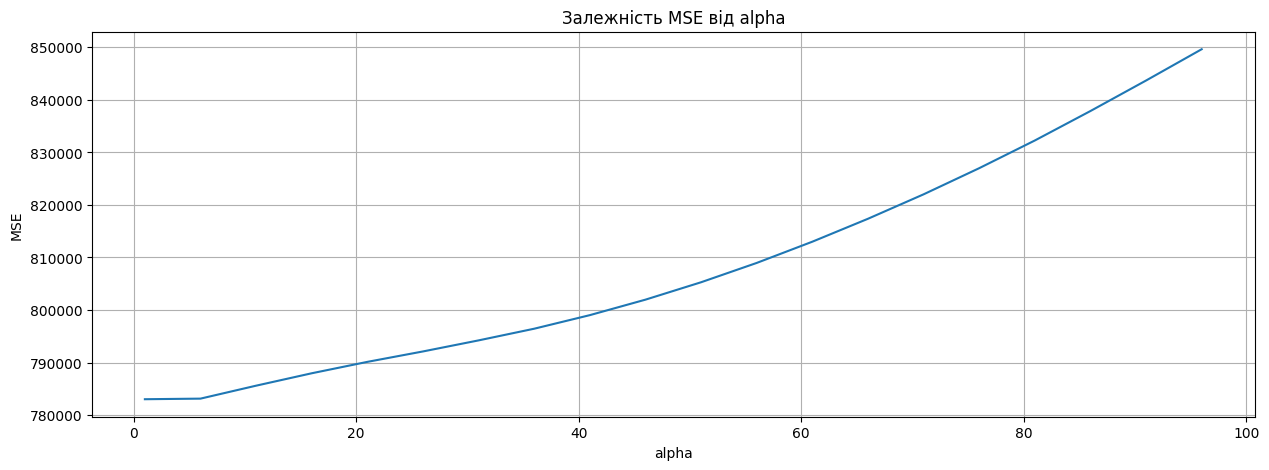

In [24]:
alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas)
regressor.fit(X, y)

data = list(zip(regressor.alphas_, regressor.mse_path_.mean(axis=1)))
create_plot(data, 'Залежність MSE від alpha', "alpha", 'MSE')

Alphas with minimum MSE:
Alpha = 1, MSE = 691447.2507878067
Alpha = 11, MSE = 883471.1829425399
Alpha = 1, MSE = 710110.162411734
Alpha = 26, MSE = 860737.405948872
Alpha = 21, MSE = 750676.3567790003


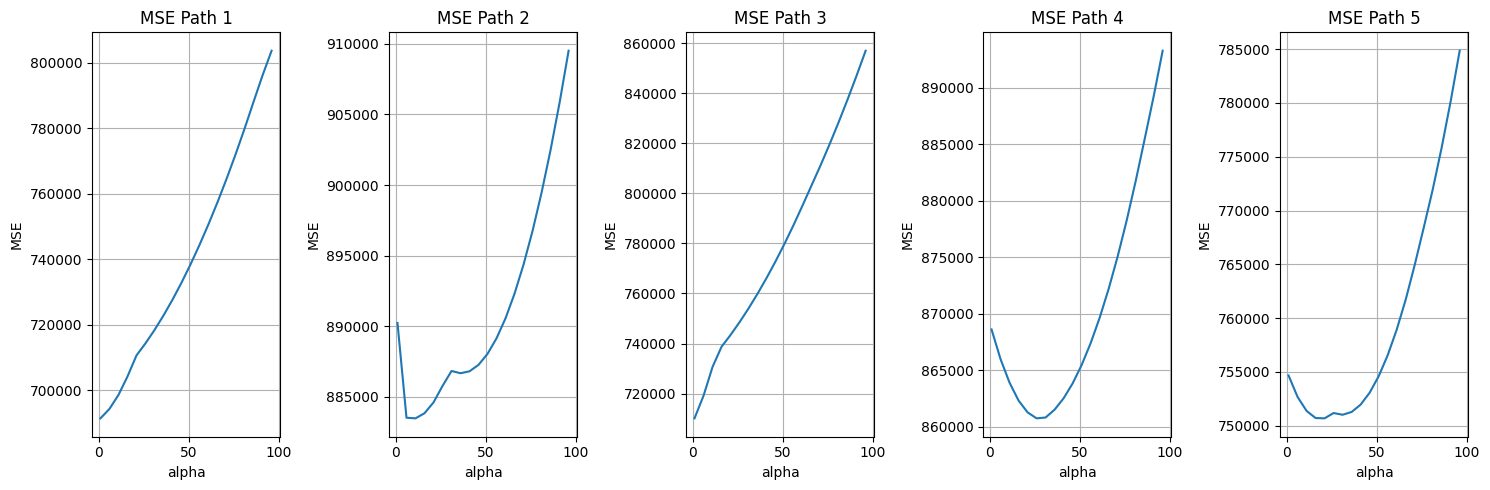

In [25]:
min_indices = np.argmin(regressor.mse_path_, axis=0)
min_alphas = regressor.alphas_[min_indices]
min_mse = regressor.mse_path_.min(axis=0)
print("Alphas with minimum MSE:")
for a, m in zip(min_alphas, min_mse):
    print(f'Alpha = {a}, MSE = {m}')

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(regressor.alphas_, regressor.mse_path_[:, i])
    ax.set_title(f"MSE Path {i+1}")
    ax.set_xlabel('alpha')
    ax.set_ylabel('MSE')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [26]:
index = regressor.coef_.argsort()[-4:]
top_features = df.columns[index]
top_coefs = regressor.coef_[index]

for feature, coef in zip(top_features, top_coefs):
    print(f"Feature = {feature}, Coefficient = {coef}")

Feature = temp, Coefficient = 376.3632362096943
Feature = season, Coefficient = 560.2416160308861
Feature = atemp, Coefficient = 576.530793504555
Feature = yr, Coefficient = 1019.4634940657196


In [27]:
index = regressor.coef_.argsort()[:3]
top_negative_features = df.columns[index]
top_negative_coefs = regressor.coef_[index]

for feature, coef in zip(top_negative_features, top_negative_coefs):
    print(f"Feature = {feature}, Coefficient = {coef}")

Feature = weathersit, Coefficient = -332.3698569623487
Feature = windspeed(mph), Coefficient = -197.1396894024843
Feature = hum, Coefficient = -144.12915500348583


In [28]:
index = np.where(np.abs(regressor.coef_) < 1e-3)[0]
near_zero_features = df.columns[index]
near_zero_coefs = regressor.coef_[index]

for feature, coef in zip(near_zero_features, near_zero_coefs):
    print(f"Feature = {feature}, Coefficient = {coef:.8f}")

Feature = windspeed(ms), Coefficient = -0.00000003
